In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from statsmodels.formula.api import ols

In [3]:
df_transactions = pd.read_csv('transactions.csv')
# df_transactions.head()
# print(type(df_transactions))
# print(len(df_transactions))
# print(df_transactions.shape)
# print(df_transactions.describe)
# print(df_transactions.info())
# print(df_transactions.isnull().sum().sum())
# print(df_transactions[["days_after_open","day_of_week","hours_after_open","drink_id",
# "name","unit_price","quantity","raining","study_area_id","study_area_name","dist_to_cafe"]].value_counts())

# ***Task 1:***

## **1. Seasonality:**

### **(Adjusting Graphs For Better Quality).**


### **i. Days:**

In [4]:
df_transactions['revenue'] = df_transactions['unit_price'] * df_transactions['quantity']

In [5]:
hours_open = 6
total_rev_each_day = df_transactions.groupby(['date',"day_of_week"]).sum()['revenue']

mean_daily_rev = total_rev_each_day.reset_index(level=0).groupby('day_of_week').mean()
mean_daily_rev_ph = mean_daily_rev/hours_open

# print(total_rev_each_day.head(40))
# print(df_transactions['day_of_week'].value_counts())
mean_daily_rev_ph

,revenue
day_of_week,
Fri,154.228030
Mon,145.654545
Sat,145.927273
Sun,149.926515
Thu,166.267424
Tue,157.486364
Wed,177.293939


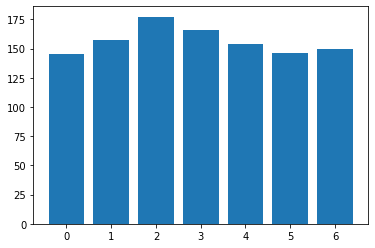

In [6]:
# This is the code of the original graph from previous consultant.
days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

plt.bar(np.arange(0, 7), mean_daily_rev_ph.loc[days]['revenue'])
plt.savefig('Bad Daily Seasonality.pdf')

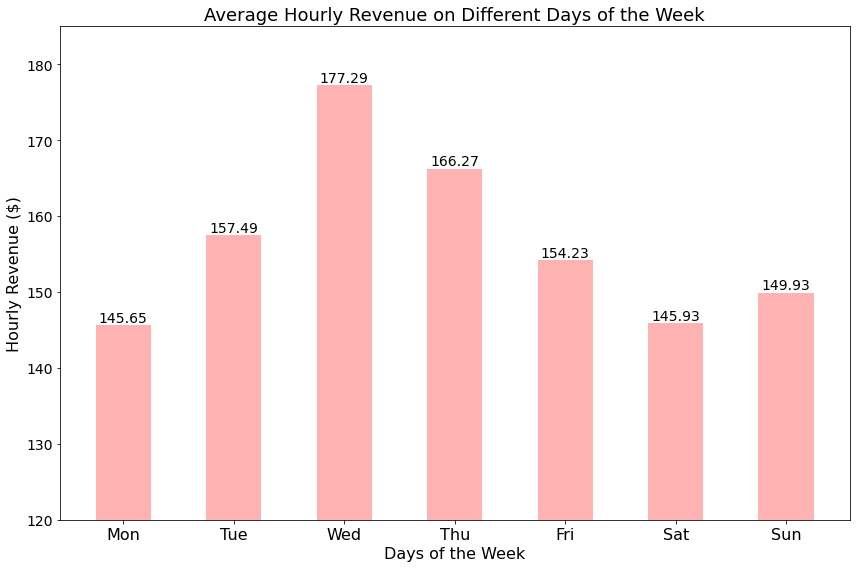

In [7]:
# This is the modified graph code.
plt.figure(figsize = (12, 8))
x = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
y = round(mean_daily_rev_ph.loc[x]['revenue'],2)
fz = 14
plt.bar(days, y, width = 0.5, alpha = 0.3, color = "r")

plt.xlabel("Days of the Week", fontsize = fz+2)
plt.ylabel("Hourly Revenue ($)", fontsize = fz+2)
plt.title("Average Hourly Revenue on Different Days of the Week", fontsize = fz+4)

# plt.legend(fontsize = fz)
plt.xticks(fontsize = fz+2)
plt.yticks(fontsize = fz)

# Retrieved from https://stackabuse.com/how-to-set-axis-range-xlim-ylim-in-matplotlib/
plt.ylim([120, 185])

for i, j in zip(x, y):
    plt.text(i, j, str(j), va='bottom', ha ="center",fontsize=fz )

plt.tight_layout()
plt.savefig('Good Daily Seasonality.pdf')

### **ii. Hours:**

In [8]:
total_rev_each_hour = df_transactions.groupby(["hours_after_open", 'date']).sum()['revenue']
mean_hourly_rev = total_rev_each_hour.reset_index(level=0).groupby('hours_after_open').mean()

mean_hourly_rev

,revenue
hours_after_open,
0,162.827922
1,172.752597
2,166.997403
3,155.794156
4,144.457143
5,138.168627


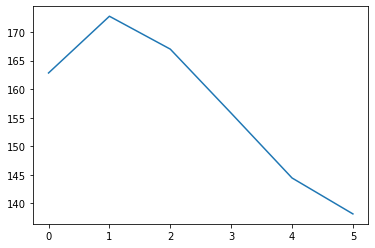

In [9]:
# This is the code of the original graph from previous consultant.
plt.plot(mean_hourly_rev)

plt.savefig('Bad Hourly Seasonality.pdf')

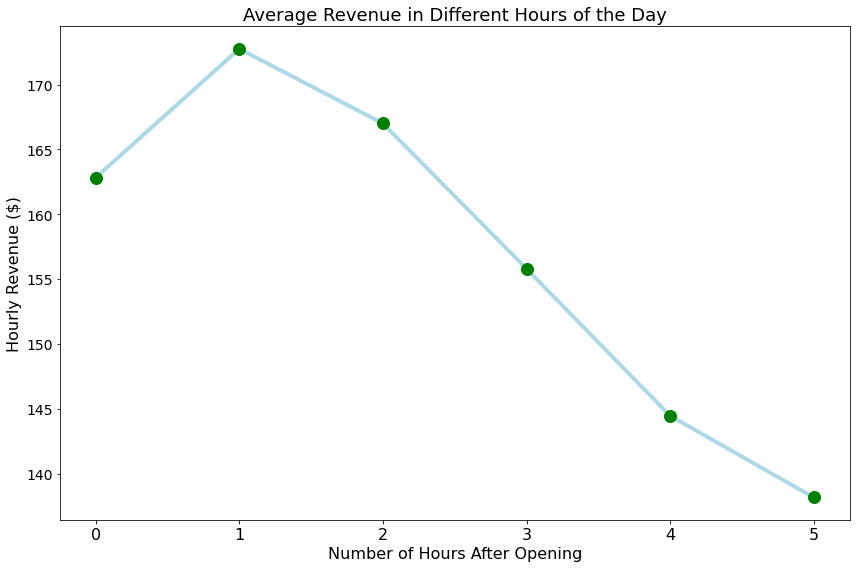

In [10]:
# This is the modified graph code.
plt.figure(figsize = (12, 8))
x = np.array([0,1,2,3,4,5])
y = mean_hourly_rev
fz = 14
plt.plot(x,y,color = 'lightblue', linestyle = '-', marker = 'o', linewidth = 4,
ms = 12, mec = "green", mfc = "green" )

plt.xlabel("Number of Hours After Opening", fontsize = fz+2)
plt.ylabel("Hourly Revenue ($)", fontsize = fz+2)
plt.title("Average Revenue in Different Hours of the Day", fontsize = fz+4)

# plt.legend(fontsize = fz)
plt.xticks(fontsize = fz+2)
plt.yticks(fontsize = fz)

plt.tight_layout()
plt.savefig('Good Hourly Seasonality.pdf')

## **2. Days Since Opened:**

### **(Transforming the Data & Visually Presenting it to Confirm its Suitability).**

In [11]:
# This code performs different transfomation on the daily_revenue dataframe obtained by summing all the 
# revenues received in one day. The transformations values are then stored in different variables.
daily_revenue = df_transactions.groupby("days_after_open").sum()['revenue']
days_after_open_column = df_transactions["days_after_open"]
days_after_open_column_unique = days_after_open_column.drop_duplicates()

# nono = np.linspace(0,153,num =154)

daily_revenue_log = np.log(daily_revenue)
daily_revenue_sqrt = np.sqrt(daily_revenue)
daily_revenue_squared = np.square(daily_revenue)

# print(daily_revenue_log)
# print(daily_revenue_squared)

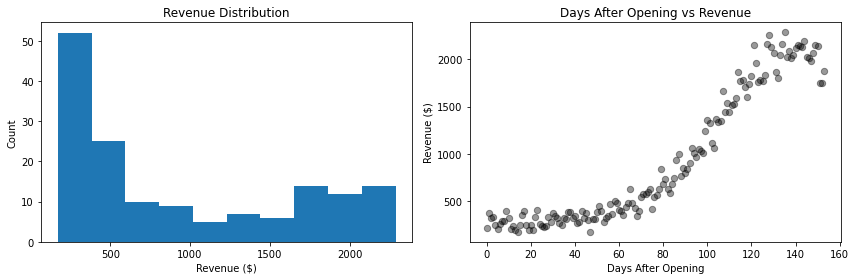

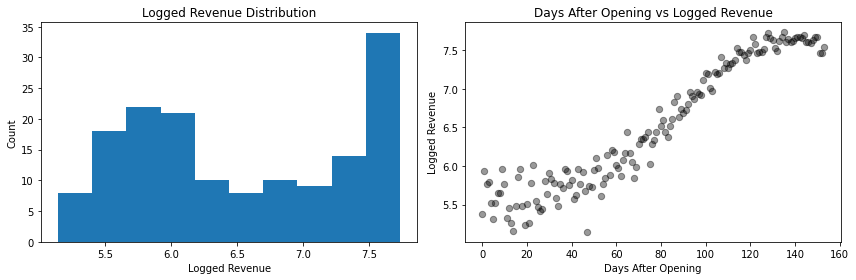

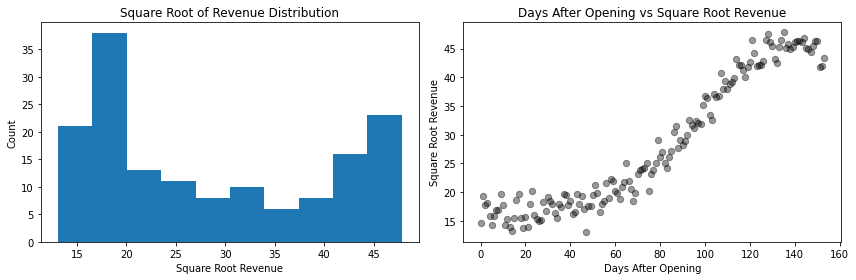

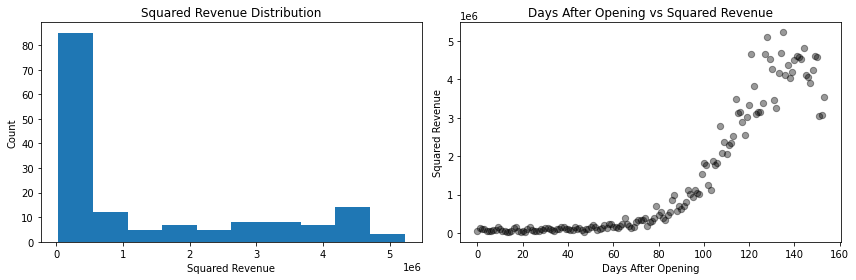

In [12]:
# This code plots the transformations' distributions and scatter plot against days since opening. 
fig1, (ax0, ax1) = plt.subplots(nrows=1,ncols=2,figsize = (12, 4))
fig2, (ax2,ax3) = plt.subplots(nrows=1,ncols=2, figsize = (12, 4))
fig3, (ax4,ax5) = plt.subplots(nrows=1,ncols=2, figsize = (12, 4))
fig4, (ax6,ax7) = plt.subplots(nrows=1,ncols=2, figsize = (12, 4))

ax0.hist(daily_revenue, bins= 10)
ax0.set_title('Revenue Distribution')
ax0.set(axisbelow=True, xlabel='Revenue ($)', ylabel='Count')

ax1.scatter(days_after_open_column_unique,daily_revenue, marker = 'o', s = 40, c = 'black', alpha = 0.4)
ax1.set_title('Days After Opening vs Revenue')
ax1.set(axisbelow=True, xlabel='Days After Opening', ylabel='Revenue ($)')

ax2.hist(daily_revenue_log, bins= 10)
ax2.set_title('Logged Revenue Distribution')
ax2.set(axisbelow=True, xlabel='Logged Revenue', ylabel='Count')

ax3.scatter(days_after_open_column_unique, daily_revenue_log, marker = 'o', s = 40, c = 'black', alpha = 0.4 )
ax3.set_title('Days After Opening vs Logged Revenue')
ax3.set(axisbelow=True, xlabel='Days After Opening', ylabel='Logged Revenue')

ax4.hist(daily_revenue_sqrt, bins= 10)
ax4.set_title('Square Root of Revenue Distribution')
ax4.set(axisbelow=True, xlabel='Square Root Revenue', ylabel='Count')

ax5.scatter(days_after_open_column_unique, daily_revenue_sqrt, marker = 'o', s = 40, c = 'black', alpha = 0.4)
ax5.set_title('Days After Opening vs Square Root Revenue')
ax5.set(axisbelow=True, xlabel='Days After Opening', ylabel='Square Root Revenue')

ax6.hist(daily_revenue_squared, bins= 10)
ax6.set_title('Squared Revenue Distribution')
ax6.set(axisbelow=True, xlabel='Squared Revenue', ylabel='Count')

ax7.scatter(days_after_open_column_unique, daily_revenue_squared, marker = 'o', s = 40, c = 'black', alpha = 0.4)
ax7.set_title('Days After Opening vs Squared Revenue')
ax7.set(axisbelow=True, xlabel='Days After Opening', ylabel='Squared Revenue')

fig1.tight_layout()
fig2.tight_layout()
fig3.tight_layout()
fig4.tight_layout()

fig1.savefig('Pre_Transformations.pdf')
fig2.savefig('After_Transformations.pdf')

## **3. Customer Location:**

### **(Investigating a Variable that Interacts with Location to affect Revenue).**

In [13]:
# df_transactions

In [14]:
# This is the old code from the conssultant that calculates average daily revenue based on "study_area_name".
daily_location_rev = df_transactions.groupby(["study_area_name", 'date']).sum()['revenue']
mean_daily_location_rev = daily_location_rev.reset_index(level=0).groupby('study_area_name').mean()

mean_daily_location_rev

,revenue
study_area_name,
Abercrombie (H70),72.194079
Brennan MacCallum (A18),68.655195
Carslaw (F07),164.060390
Fisher Library (F03),261.519481
Law Library (F10),237.569481
Peter Nicol Russell (PNR),71.294118
The Quarter (A16),66.208442


In [15]:
# This code creates a variable of the names of all study areas and creates a new variable that contains
# revenues grouped by 'study_area_name' and 'raining'columns. 
study_area_name_column_unique = ['Abercrombie (H70)','Brennan MacCallum (A18)','Carslaw (F07)','Fisher Library (F03)','Law Library (F10)','Peter Nicol Russell (PNR)','The Quarter (A16)']

daily_location_rain = df_transactions.groupby(["study_area_name", 'raining'])['revenue'].sum()
print(daily_location_rain.reset_index(level=0))


                   study_area_name  revenue
raining                                    
No               Abercrombie (H70)  10973.5
No         Brennan MacCallum (A18)  10572.9
No                   Carslaw (F07)  21229.8
Yes                  Carslaw (F07)   4035.5
No            Fisher Library (F03)  20722.9
Yes           Fisher Library (F03)  19551.1
No               Law Library (F10)  20906.0
Yes              Law Library (F10)  15679.7
No       Peter Nicol Russell (PNR)  10908.0
No               The Quarter (A16)  10196.1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


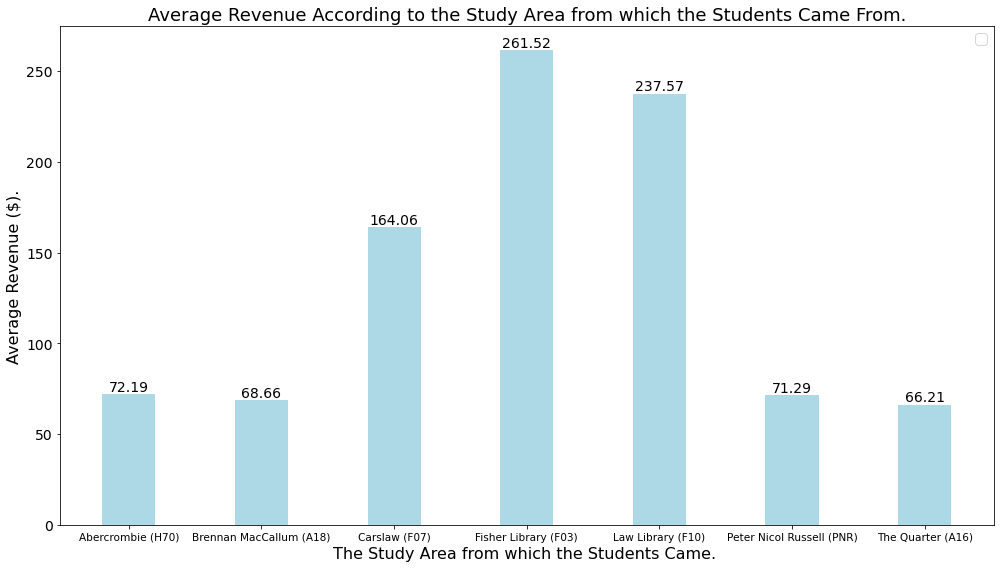

In [16]:
# This barchart will demonstrate the changing revenue based on the study space that the students are 
# coming from. mean_daily_location_rev.to_numpy()
plt.figure(figsize = (14, 8))
xpos = study_area_name_column_unique
height = (72.19,68.66,164.06,261.52,237.57,71.29,66.21)
fz = 14
w = 0.4
plt.bar(xpos, height, width = w, color = 'lightblue')

plt.xlabel("The Study Area from which the Students Came. ", fontsize = fz+2)
plt.ylabel("Average Revenue ($).", fontsize = fz+2)
plt.title("Average Revenue According to the Study Area from which the Students Came From."
, fontsize = fz+4)

plt.legend(fontsize = fz)
plt.xticks(fontsize = fz-3.5)
plt.yticks(fontsize = fz)

for i, j in zip(xpos, height):
    plt.text(i, j, str(j), va='bottom', ha ="center",fontsize=fz )

plt.tight_layout()
plt.savefig('Location vs Average Revenue.pdf')

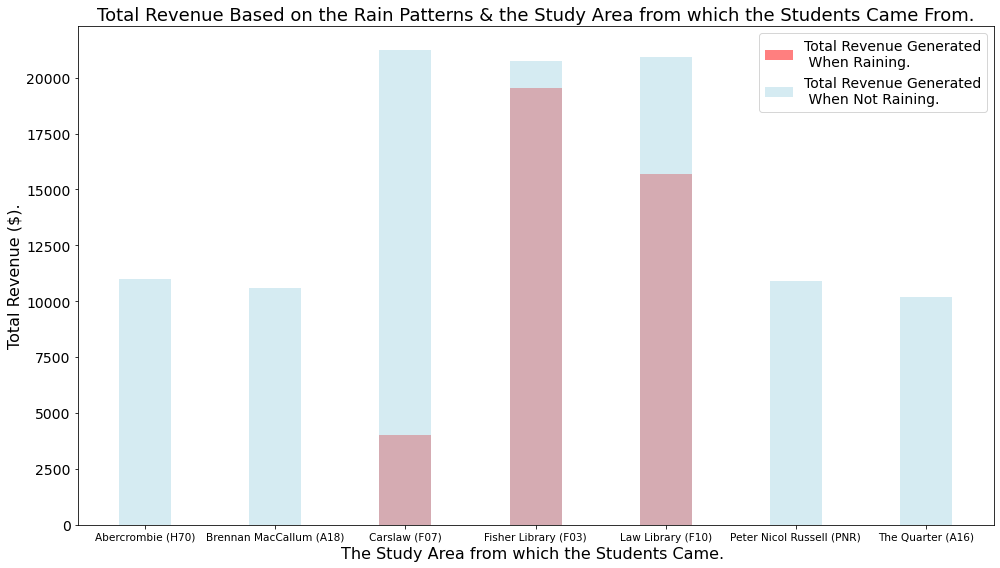

In [17]:
# This is the code for plotting the interaction between the two independent variables "Location & raining"
# and the dependent variable Revenue measured in $.
plt.figure(figsize = (14, 8))
xpos = study_area_name_column_unique
Revenue_when_raining = [0,0,4035.5,19551.1,15679.7,0,0]
Revenue_when_not_raining = [10973.5,10572.9,21229.8,20722.9,20906.0,10908.0,10196.1]
fz = 14
w = 0.4 # width
adjusted_xpos = (xpos)

plt.bar(xpos, Revenue_when_raining, width = w, color = 'red', label = 'Total Revenue Generated\n When Raining.',alpha = 0.5)
plt.bar(adjusted_xpos, Revenue_when_not_raining, width = w, color = 'lightblue', label = 'Total Revenue Generated\n When Not Raining.',alpha = 0.5)

plt.xlabel("The Study Area from which the Students Came. ", fontsize = fz+2)
plt.ylabel("Total Revenue ($).", fontsize = fz+2)
plt.title("Total Revenue Based on the Rain Patterns & the Study Area from which the Students Came From."
, fontsize = fz+4)

plt.legend(fontsize = fz)
plt.xticks(fontsize = fz-3.5)
plt.yticks(fontsize = fz)

plt.tight_layout()
plt.savefig('Location & Weather Interacting with Revenue.pdf')
# mean_daily_location_rev = daily_location_rev.reset_index(level=0).groupby('study_area_name').mean()

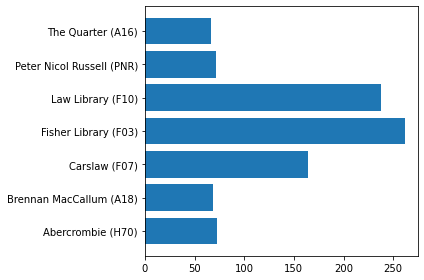

In [18]:
# This is the code of the old barchart created by the consultant.  
plt.barh(mean_daily_location_rev.index, mean_daily_location_rev['revenue'])
plt.tight_layout()
plt.savefig('Bad Barchart For Interaction.pdf')

# **Task 2:**

### **i. Additional EDA Plus OLS Analysis:**

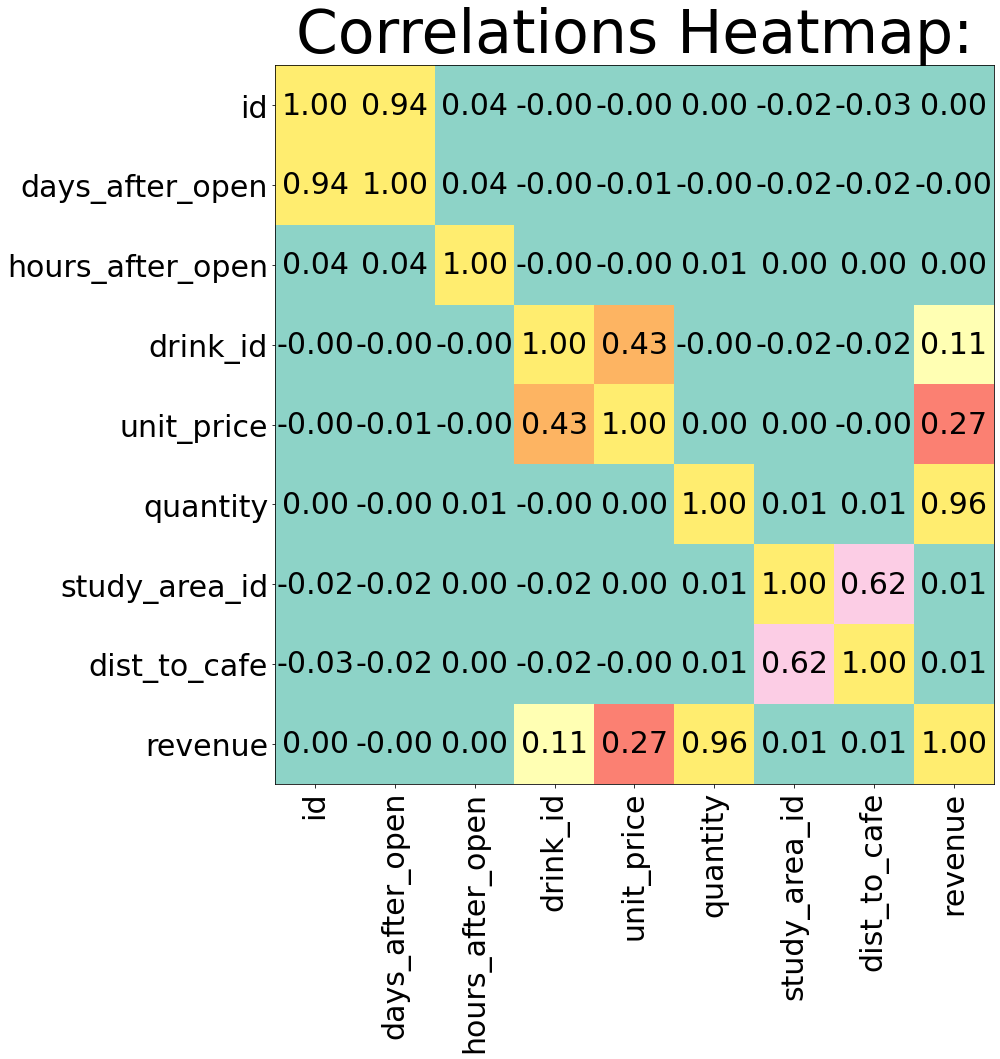

In [19]:
# find Correlations of the dataframe df_transactions.
numerical_variables = df_transactions[['days_after_open','hours_after_open','drink_id','unit_price','quantity','dist_to_cafe']]
corr_df = df_transactions.corr()

# Adjust the figure size
plt.figure(figsize = (30, 14))

#plot the heat map
plt.imshow(corr_df, cmap = 'Set3')

# Number of variables
n_var = len(corr_df)

# adding axis titles
plt.xticks(range(n_var), corr_df.columns, fontsize = 30, rotation = 90)
plt.yticks(range(n_var), corr_df.columns, fontsize = 30)

# naming each cell. 
for i in range(n_var):
    for j in range(n_var):
        #  format to 2 decimal places  ,  horizonta/vertical align center  
        plt.text(i, j, '{:.2f}'.format(corr_df.iloc[i, j]), ha="center", va="center", color="k", fontsize = 30)

plt.tight_layout()
plt.title('Correlations Heatmap:', fontsize = 60)
plt.savefig('Correlation Heatmap.pdf')

In [20]:
# fit simple linear regression model
ols_model_variable = df_transactions.groupby(["days_after_open",'day_of_week'])['quantity'].sum()
ols_model_variable = ols_model_variable.reset_index()

model_lin = ols("quantity  ~ days_after_open + day_of_week",data=ols_model_variable)
result_lin = model_lin.fit()
result_lin.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               quantity   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     147.9
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           5.55e-63
Time:                        23:20:05   Log-Likelihood:                -846.55
No. Observations:                 154   AIC:                             1709.
Df Residuals:                     146   BIC:                             1733.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -52.3065     15.486     -3.378      0.001     -82.912     -21.701
day_of_week[T.Mon]     0.8601     18.287      0.047      0.963     -35.281      37.001
day_of_week[T.Sat]   -16.2491     18.282     -0.889      0.376     -52.381      19.882
day_of_week[T.Sun]   -14.3619     18.283     -0.786      0.433     -50.495      21.772
day_of_week[T.Thu]    20.6128     18.282      1.127      0.261     -15.519      56.744
day_of_week[T.Tue]    14.6564     18.285      0.802      0.424     -21.480      50.793
day_of_week[T.Wed]    39.9528     18.283      2.185      0.030       3.819      76.086
days_after_open        3.5218      0.110     32.011      0.000       3.304       3.739
==============================================================================
Omnibus:                       73.679   Durbin-Watson:                   0.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.845
Skew:                           0.084   Prob(JB):                      0.00728
Kurtosis:                       1.773   Cond. No.                         659.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **ii. Multiple Linear Regression Model:**

     Mon  Sat  Sun  Thu  Tue  Wed
0      1    0    0    0    0    0
1      0    0    0    0    1    0
2      0    0    0    0    0    1
3      0    0    0    1    0    0
4      0    0    0    0    0    0
..   ...  ...  ...  ...  ...  ...
149    0    0    0    0    0    1
150    0    0    0    1    0    0
151    0    0    0    0    0    0
152    0    1    0    0    0    0
153    0    0    1    0    0    0

[154 rows x 6 columns]
R^2 is: 0.9232
beta 0: -33.390901
beta 1: 2.465328
beta 2: 1.301894
beta 3: 2.374209
beta 4: -10.162555
beta 5: -2.425455
beta 6: 12.395820
beta 7: 10.066645
beta 8: 28.489780
mse: 2166.6204


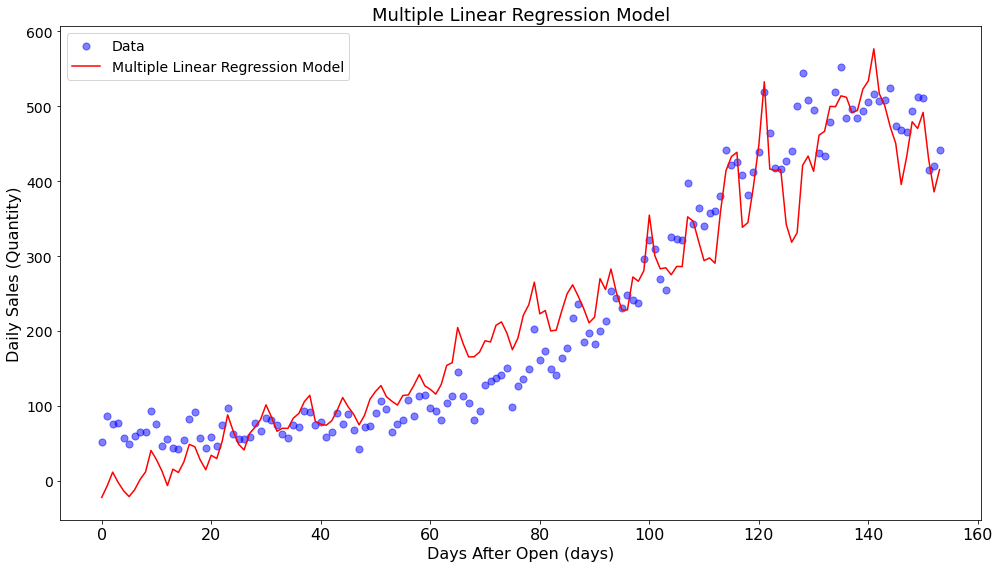

In [21]:
# This code creates a Multiple Linear Regression Model and plots it on a scatter plot.
df_transactions["raining_adjusted"] = ""
# print(df_transactions)
df_transactions['raining_adjusted'].mask(df_transactions['raining']
== "Yes", 1, inplace=True)
df_transactions['raining_adjusted'].mask(df_transactions['raining']
== "No", 0, inplace=True)
# print(df_transactions)

# We group by days_after_open followed by day_of_week and we sum all the data in quantity and raining_adjusted.
daily_sales_multi_Regressors = df_transactions.groupby(["days_after_open",'day_of_week'])[['quantity','raining_adjusted']].agg(["sum"])
daily_sales_multi_Regressors = daily_sales_multi_Regressors.reset_index()
# print(daily_sales_multi_Regressors)
relevant_columns = daily_sales_multi_Regressors.iloc[:,[0,3]] 
daily_sales_column = daily_sales_multi_Regressors.iloc[:,2] 
# we create a dummy variable for day_of_week
adjusted_day_of_week = pd.get_dummies(daily_sales_multi_Regressors['day_of_week'], drop_first = True)
print(adjusted_day_of_week)

# This part puts together all relevant features in one numpy array. 
daily_sales_multi_Regressors_final = np.hstack((relevant_columns, adjusted_day_of_week))
# print(daily_sales_multi_Regressors_final)

# Extracting out X and y
# -------------------
X = daily_sales_multi_Regressors_final
y = daily_sales_column.to_numpy()
# ---------------------------
# Building my regression model
# ---------------------------
linear_reg = LinearRegression()
linear_reg.fit(X, y)
print("R^2 is: {:.4f}".format(linear_reg.score(X,y)))

# ---------------------------
# Making Predictions
# ---------------------------
beta0 = linear_reg.intercept_
beta1 = linear_reg.coef_[0]
beta2 = linear_reg.coef_[1]
beta3 = linear_reg.coef_[2]
beta4 = linear_reg.coef_[3]
beta5 = linear_reg.coef_[4]
beta6 = linear_reg.coef_[5]
beta7 = linear_reg.coef_[6]
beta8 =linear_reg.coef_[7]

xx1 = daily_sales_multi_Regressors_final[:,0]
xx2 = daily_sales_multi_Regressors_final[:,1]
xx3 = daily_sales_multi_Regressors_final[:,2]
xx4 = daily_sales_multi_Regressors_final[:,3]
xx5 = daily_sales_multi_Regressors_final[:,4]
xx6 = daily_sales_multi_Regressors_final[:,5]
xx7 = daily_sales_multi_Regressors_final[:,6]
xx8 = daily_sales_multi_Regressors_final[:,7]

yy = (beta8 * xx8) + (beta7 * xx7) + (beta6 * xx6) +(beta5 * xx5) +(beta4 * xx4) +(beta3 * xx3) + (beta2 * xx2) + (beta1 * xx1) + beta0
# ---------------------------
# Printing Model parameters
# ---------------------------
print('beta 0: {:.6f}'.format(linear_reg.intercept_))
for i in range(8):
    print('beta {}: {:.6f}'.format(i+1, linear_reg.coef_[i]))

# Finding the Mean squared error between Predicted Y and Actual Y values.
# --------------
model_mse = mse(y, yy)
print("mse: {:.4f}".format(model_mse))
# Ploting the model 
# --------------
plt.figure(figsize = (14, 8))
fz = 14

plt.scatter(X[:,0], y, c='blue', marker = 'o', s = 50, alpha = 0.5, label = 'Data')
plt.plot(xx1, yy, color = 'red', label = 'Multiple Linear Regression Model')

plt.xlabel('Days After Open (days)', fontsize = fz+2)
plt.ylabel('Daily Sales (Quantity)',fontsize = fz+2)
plt.title("Multiple Linear Regression Model", fontsize = fz+4)

plt.legend(fontsize = fz)
plt.xticks(fontsize = fz+2)
plt.yticks(fontsize = fz)

plt.tight_layout()
plt.savefig('Multiple Linear Regression Model.pdf')



### **iii. Polynomial Regression Model (Degree 3) :**

R^2 is: 0.9548
beta 0: 109.357449
beta 1: -5.299093
beta 2: 0.107955
beta 3: -0.000363
Train mse: 1412.5997
Validation mse: 920.5098


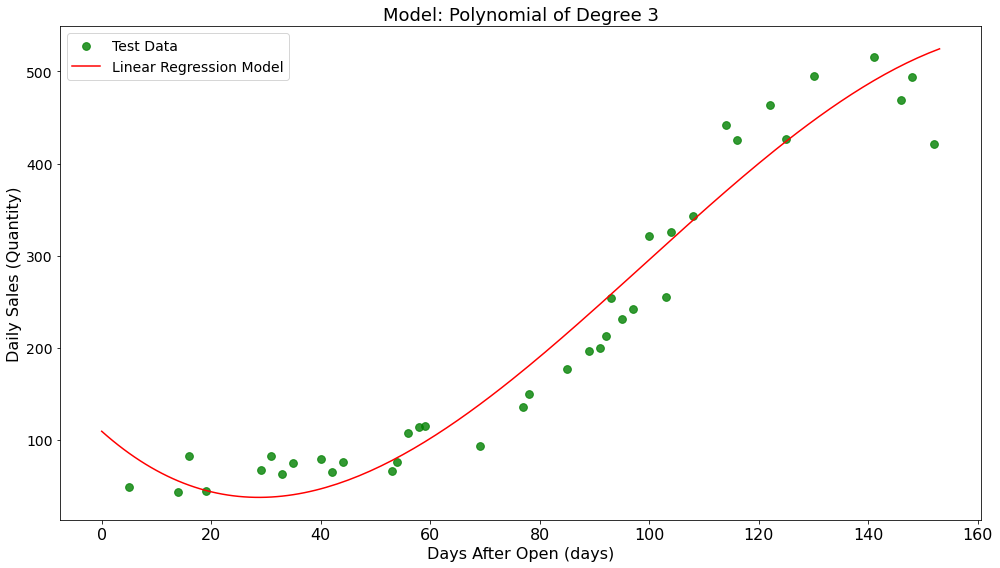

In [22]:
# This code creates a polynomial regression model and plots it on a scatter plot.
daily_sales = df_transactions.groupby(["days_after_open",'date']).sum()['quantity']
days_after_open_column = np.linspace(df_transactions["days_after_open"].min(), df_transactions["days_after_open"].max(),154)
days_after_open_column_squared = days_after_open_column**2
days_after_open_column_cube = days_after_open_column**3
days_after_open_final = np.hstack((days_after_open_column.reshape(-1,1), days_after_open_column_squared.reshape(-1,1),days_after_open_column_cube.reshape(-1,1)))
# -------------------
# Extracting out X and y
# -------------------
X = days_after_open_final
y = daily_sales.to_numpy()
# ---------------------------
# Train-test split
# ---------------------------
X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
X_train, X_vali, y_train, y_vali = train_test_split(X_tv, y_tv, test_size = 1/3, random_state = 1)
# ---------------------------
# Building my regression model
# ---------------------------
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
print("R^2 is: {:.4f}".format(linear_reg.score(X_train,y_train)))
# ---------------------------
# Making Predictions
# ---------------------------
beta0 = linear_reg.intercept_
beta1 = linear_reg.coef_[0]
beta2 = linear_reg.coef_[1]
beta3 = linear_reg.coef_[2]
xx = days_after_open_column
yy = (beta3 * xx**3) + (beta2 * xx**2) + (beta1 * xx) + beta0
# ---------------------------
# Printing Model parameters
# ---------------------------
print('beta 0: {:.6f}'.format(linear_reg.intercept_))
for i in range(3):
    print('beta {}: {:.6f}'.format(i+1, linear_reg.coef_[i]))

# Finding the Mean squared error between predicted train Y and actual tain Y values. Also mse is found
# between predicted validation y and actual validation y values.
pred_train = linear_reg.predict(X_train)
pred_vali = linear_reg.predict(X_vali)

mse_train = mse(y_train, pred_train)
mse_vali = mse(y_vali, pred_vali)

print("Train mse: {:.4f}".format(mse_train))
print("Validation mse: {:.4f}".format(mse_vali))
# ----------------------
# Ploting the training data
# ----------------------
plt.figure(figsize = (14, 8))
fz = 14
plt.scatter(X_test[:,0],y_test, c='green', label ="Test Data", marker = 'o', s = 60, alpha = 0.8)
# ---------------------------
# Ploting the model 
# ---------------------------
plt.plot(xx, yy, color = 'red', label = 'Linear Regression Model')

plt.xlabel('Days After Open (days)', fontsize = fz+2)
plt.ylabel('Daily Sales (Quantity)',fontsize = fz+2)
plt.title("Model: Polynomial of Degree 3", fontsize = fz+4)

plt.legend(fontsize = fz)
plt.xticks(fontsize = fz+2)
plt.yticks(fontsize = fz)

plt.tight_layout()
plt.savefig('Polynomial degree 3.pdf')